# Project: No-Show Analysis of Medical Patients

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

> The dataset used for this project contains information on a 100thousand patients in Brazil who were booked for medical appointments. It also contains information on whether they showed up or didn't show up for their registered appointment.
The dataset was downloaded from kaggle [here](https://www.kaggle.com/datasets/joniarroba/noshowappointments). Each observation is made up 14 attributes collected to help with our analysis. 

> The information collected on each potential patient are as follows;
* `PatientId`: Unique number given to identify each patient.
* `AppointmentID`: Unique identifier for each registered appointment.
* `Gender`: Identifies if a patient is Male or Female.
* `ScheduledDay`: Indicates the date on which the appointment was registered.
* `AppointmentDay`: Indicates the date booked for the patient's appointment(Date to visit the clinic).
* `Age`: Represents the patient's age.
* `Neighbourhood`: Indicates the area in where the patient lives.
* `Scholarship`: Indicates if the patient is enrolled in [Bolsa Familia](https://www.google.com/url?q=https://en.wikipedia.org/wiki/Bolsa_Fam%25C3%25ADlia&sa=D&source=editors&ust=1653565044883782&usg=AOvVaw03HnXIAYBEViKyTyu0Pilx) welfare program.
* `Hypertenstion`: Signifies if the patient is Hypertensive.
* `Diabetes`: Signifies if the patient suffers from diabetes.
* `Alcoholism`: Indicates if the patient suffers from alcohol addiction.
* `Handicapped`: Signifies if the patient lives with a disability.
* `SMS_received`: Indicates if the patient was reminded about their appointment via SMS
* `No-Show`: Indicates if the patient did not show up for the appointment (‘No’ if the patient showed up to their appointment, and ‘Yes’ if they did not show up)


### Question(s) for Analysis
> We would be looking to answer some questions and try to find out if these variables can help predict patients showing up for their appointment or not and the other variables provided ;
* How does gender and Age influence on No-shows ?
* Does the day of the week have an effect on No-show ?
* Does neighbourhood influence patients showing up or not ?
* Is there a relationship between patients on scholarship and showing up for appointments ?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

plt.style.use('ggplot') 

%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [2]:
# Load your data and print out a few lines.
appointments = pd.read_csv("Database_No_show_appointments/noshowappointments-kagglev2-may-2016.csv")

appointments.head(3)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No


In [3]:
# Show number of columns and rows
appointments.shape

(110527, 14)

In [4]:
# Get information on data types null values in each column
appointments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [5]:
# Get number of duplicate rows and number of null values in the dataset
print(appointments.duplicated().sum())
appointments.isnull().sum()

0


PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

* PatientID column could be converted to strings, to help with grouping.
* We can see that there are no null values present in the dataset. 
* We should convert the ScheduledDay and AppointmentDay columns to datetime  format. 
* Some column names have been misspelt and should be corrected.
* The data provided does not seem to have duplicate rows. 

In [6]:
# Returns descriptive statistics on numeric columns
appointments.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


* The minimum age is -1, this is impossible.
* Handicap column has a maximum value of 4 ? 

In [7]:
# returns number of unique values per column
appointments.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

* Handicap column has 5 unique values, it should have two 0 and 1 representing True or False.
* Some patients were booked for multiple appointments. 
* Scheduled day has a wide range of unique values unlike AppointmentDay, the first few rows of the dataset show that patients were not assigned specific time to show up on the day of their appointments.


### Data Cleaning
 

In [8]:
# observe column names
appointments.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show'],
      dtype='object')

In [9]:
# Rename columns to make format consistent and easy to remember
appointments.columns = ['patient_id', 'appointment_id', 'gender', 'scheduled_day',
       'appointment_day', 'age', 'neighbourhood', 'scholarship', 'hypertension',
       'diabetes', 'alcoholism', 'handicap', 'sms_received', 'no_show']

In [10]:
# Convert patient_id column to string data type
appointments.patient_id = appointments.patient_id.astype(int).astype(str)

In [11]:
#  Convert appointment_day and scheduled_day to datetime.date 
appointments.appointment_day = pd.to_datetime(appointments.appointment_day).dt.normalize()
appointments.scheduled_day = pd.to_datetime(appointments.scheduled_day).dt.normalize()

We drop the time values in the scheduled_day because patients are not given a specific time to show up for their appointments, 00:00:00 is not helpful to our analysis. The time in scheduled_day column also is not useful to our analysis, so we remove it.  

We should create a column that tells us how many days are between scheduling_day and appointmen_day. We should also create columns to tell us what day of the week patients call to be booked for an appointment and what day of the week patients are booked to come into the clinic. 

In [12]:
# create day of the week columns
appointments['appointment_dow'] = appointments.appointment_day.dt.day_name()
appointments['scheduled_dow'] = appointments.scheduled_day.dt.day_name()

# create column to hold number of days between scheduling day and appointment day
appointments['wait_days'] = (appointments.appointment_day - appointments.scheduled_day).dt.days

In [13]:
# check for wait_days less than zero.
appointments.query('wait_days < 0')

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show,appointment_dow,scheduled_dow,wait_days
27033,7839272661752,5679978,M,2016-05-10,2016-05-09,38,RESISTÊNCIA,0,0,0,0,1,0,Yes,Monday,Tuesday,-1
55226,7896293967868,5715660,F,2016-05-18,2016-05-17,19,SANTO ANTÔNIO,0,0,0,0,1,0,Yes,Tuesday,Wednesday,-1
64175,24252258389979,5664962,F,2016-05-05,2016-05-04,22,CONSOLAÇÃO,0,0,0,0,0,0,Yes,Wednesday,Thursday,-1
71533,998231581612122,5686628,F,2016-05-11,2016-05-05,81,SANTO ANTÔNIO,0,0,0,0,0,0,Yes,Thursday,Wednesday,-6
72362,3787481966821,5655637,M,2016-05-04,2016-05-03,7,TABUAZEIRO,0,0,0,0,0,0,Yes,Tuesday,Wednesday,-1


In [14]:
# Keep only rows with wait days equal or greater than zero
appointments = appointments.query('wait_days >= 0')

In [15]:
appointments.shape

(110522, 17)

We check for wait days that are less than zero, this means that the date of scheduling comes after the day of appointment which is impossible!. This could be an error from data entry.  
We can solve this error by swapping the dates in both columns but since we are uncertain about it being an error from data entry we shall drop the rows with these negative values.

In [16]:
# find ages less than zero
appointments.query('age < 0')

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show,appointment_dow,scheduled_dow,wait_days
99832,465943158731293,5775010,F,2016-06-06,2016-06-06,-1,ROMÃO,0,0,0,0,0,0,No,Monday,Monday,0


In [17]:
appointments.query("patient_id == '465943158731293'")

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show,appointment_dow,scheduled_dow,wait_days
99832,465943158731293,5775010,F,2016-06-06,2016-06-06,-1,ROMÃO,0,0,0,0,0,0,No,Monday,Monday,0


In [18]:
# drop ages less than zero
appointments = appointments.query('~(age < 0)')

In [19]:
# Investigating max age
appointments.age.value_counts().sort_index(ascending=False)[:5]

115    5
102    2
100    4
99     1
98     6
Name: age, dtype: int64

In [20]:
# number of patients aged 100 and above
hundred_plus = appointments.query('age >= 100').groupby('patient_id')['age'].count()
hundred_plus.count()

7

In [21]:
# percentage of patients aged 100 and above
hundred_plus.count()/appointments.patient_id.nunique()

0.00011236315772576968

In [22]:
appointments.shape

(110521, 17)

We check for ages less than zero, we know that it is impossible to be less than zero years old.  
Before deciding to drop the rows where the age is less than zero, we check if the patients with age less that zero occur more than once to see if we can get the correct age from their other appointments. The patient has only one appointment so we drop the row as we can ascertain the correct age of the patient.  
A quick trip to [google](https://metro.co.uk/2022/05/05/worlds-oldest-living-person-found-in-brazil-ahead-of-122nd-birthday-16590290/) says that the oldest living person in Brazil is 122. While the proportion of patients aged 100 and above in our dataset is very small, it is possible that these people are actually that old.

In [23]:
appointments.handicap.value_counts()

0    108282
1      2040
2       183
3        13
4         3
Name: handicap, dtype: int64

In [24]:
# pd.crosstab(appointments.patient_id, appointments.handicap)

# handicap_over1 = appointments.query('handicap > 1')
# handicap_over1 = handicap_over1.filter(lambda x: x.handicap.count() > 1)
# handicap_over1.groupby('patient_id').agg({'handicap': ['min','max','count','sum']})
# .agg({'handicap': ['count', 'min', 'max', 'sum']})

In [25]:
# convert all values greater than 1 in the handicap column to 1
appointments.handicap = np.where(appointments.handicap >= 1, 1 , 0)

In [26]:
appointments.handicap.value_counts()

0    108282
1      2239
Name: handicap, dtype: int64

The data source says handicap column should contain True of False, that is 1 and 0. It is possible that values greater than one were probably errors or signifying how many forms of disability a patient has. While it would add some complexity if we were to design a model to predict No-show of patients, we would opt for the simpler option of converting values greater than 1 to True or 1.

<a id='eda'></a>
## Exploratory Data Analysis

### How does gender and Age influence on No-shows ?

In [27]:
appointments.columns

Index(['patient_id', 'appointment_id', 'gender', 'scheduled_day',
       'appointment_day', 'age', 'neighbourhood', 'scholarship',
       'hypertension', 'diabetes', 'alcoholism', 'handicap', 'sms_received',
       'no_show', 'appointment_dow', 'scheduled_dow', 'wait_days'],
      dtype='object')

#### No Show

No     0.798102
Yes    0.201898
Name: no_show, dtype: float64


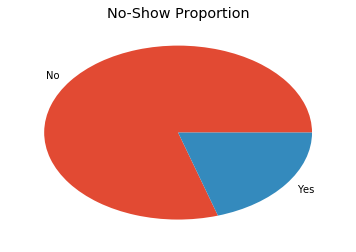

In [28]:
# Plot No-Show proportions
print(appointments.no_show.value_counts(normalize=True))
appointments.no_show.value_counts().plot(kind='pie', title='No-Show Proportion')
plt.ylabel('');

We can see that only about 20 percent of appointments failes to show up, a relative small amount.

#### Age

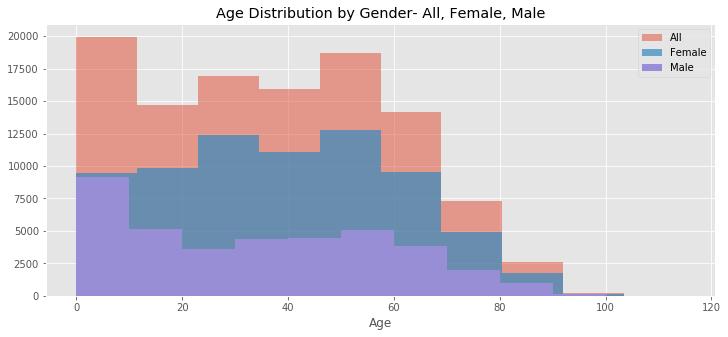

In [29]:
# Plot age distribution
appointments.age.hist(alpha=0.5, label='All', figsize=(12,5))
appointments.query('gender =="F"').age.hist(alpha=0.7, label='Female')
appointments.query('gender =="M"').age.hist(alpha=1, label='Male')
plt.xlabel('Age')
plt.legend()

plt.title('Age Distribution by Gender- All, Female, Male');

We can see the ditribution of ages in our dataset overall and by gender. Gender shows majority of our dataset consists of females.  Most Women in our dataset are aged between 20 and 60, while Men are between the ages 0 and 40.
It would be good to see if there's a relationship between age and no-show, because of the variabilty of age we would create categories to help us paint a better picture of the age of our patients.

In [30]:
# create criteria and values to categorise age column in our dataset
criteria = [appointments['age'].between(0, 5), appointments['age'].between(6, 12), appointments['age'].between(13, 18),
            appointments['age'].between(18, 59), appointments['age'].between(60,120)]
values = ['Infant', 'Child', 'Teen', 'Adult', 'Senior']

# Use Critetia and Values above to create new column with age categories
appointments['age_cat'] = np.select(criteria, values, 0)

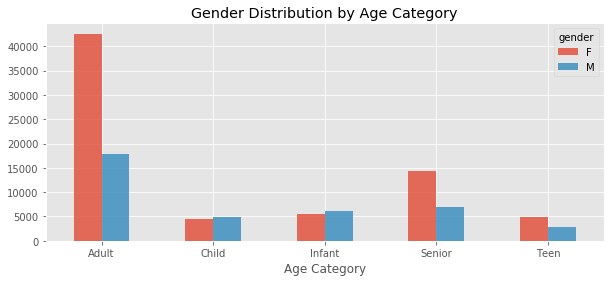

In [31]:
# Plot Gender Distribution chart
pd.crosstab(appointments.age_cat, appointments.gender).plot(kind='bar', alpha=0.8, 
                                                            title ="Gender Distribution by Age Category",
                                                           figsize=(10,4))
plt.xticks(rotation = 0)
plt.xlabel('Age Category');

## USE UNIQUE PATIENT ID TO KNOW TRUE DISTRIBUTION OF AGE AND AGE CATEGORIES ?????

There are more females in almost all the age categories, males are slightly dominant in the Child and Infant categories.

In [32]:
# Define function to help calculate proportion of people who did not show up depending on another attribute
def no_show_proportion(df, column_name):
    pivot = pd.crosstab(df[column_name], df['no_show'])
    pivot['Yes_Prop'] = pivot['Yes']/(pivot['Yes'] + pivot['No'])
    return pivot.sort_values(by='Yes_Prop', ascending=False)

In [33]:
# calculate proportion of people who don't show up by age categories column
no_show_proportion(appointments, 'age_cat')

no_show,No,Yes,Yes_Prop
age_cat,,,
Teen,5790,2040,0.260536
Child,7183,2121,0.227966
Adult,47757,12727,0.210419
Infant,9546,2185,0.186259
Senior,17931,3241,0.153080


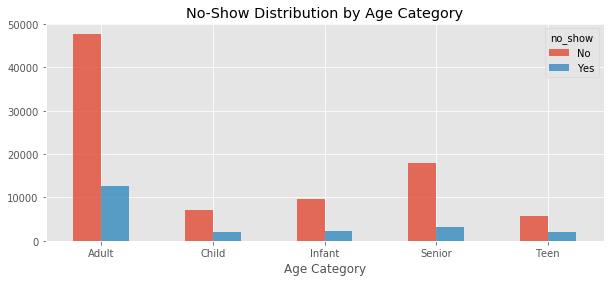

In [34]:
# plot age category against No-show
pd.crosstab(appointments.age_cat, appointments.no_show).plot(kind='bar', alpha=0.8, figsize=(10,4))
plt.xticks(rotation = 0)
plt.xlabel('Age Category') 
  
# displaying the title
plt.title("No-Show Distribution by Age Category");

Majority of people who missed their appointments were adults, this would be because of the large number of adults present in our data. Observing rate of No-Show tells us less than twenty percent of Infants and Seniors missed their appointments, which are the lowest rate of No-show by any of the age categories. 

#### Gender

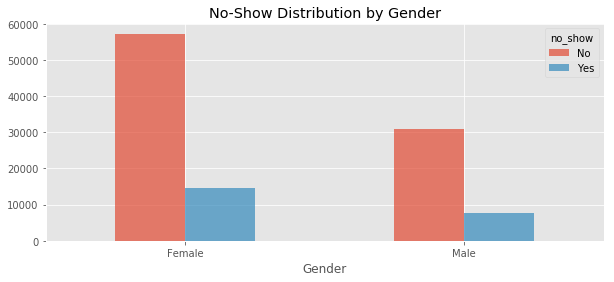

In [35]:
# Plot distribution of No-show by Gender
pd.crosstab(appointments.gender, appointments.no_show).plot(kind='bar', alpha=0.7, figsize=(10,4))
ticks, labels = plt.xticks(rotation = 0)
labels = ['Female', 'Male'] 
plt.xticks(ticks, labels)
plt.xlabel('Gender')
  
# displaying the title
plt.title("No-Show Distribution by Gender");

In [36]:
no_show_proportion(appointments, 'gender')

no_show,No,Yes,Yes_Prop
gender,,,
F,57245,14591,0.203115
M,30962,7723,0.199638


There is no significant observationn in how Female and Males show up for their appointments.

### Does the day of the week have an effect on No-show ?

In [37]:
appointments.appointment_dow.value_counts()

Wednesday    25866
Tuesday      25638
Monday       22713
Friday       19019
Thursday     17246
Saturday        39
Name: appointment_dow, dtype: int64

In [38]:
# Calculate No-Show rate for appointments that were missed.
no_show_proportion(appointments,'appointment_dow')

no_show,No,Yes,Yes_Prop
appointment_dow,,,
Saturday,30,9,0.230769
Friday,14982,4037,0.212261
Monday,18024,4689,0.206446
Tuesday,20488,5150,0.200874
Wednesday,20774,5092,0.196861
Thursday,13909,3337,0.193494


In [39]:
# convert appointment_dow column into categorical type and keep order of days
cats = [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
appointments['appointment_dow'] = appointments['appointment_dow'].astype('category', categories=cats, ordered=True)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: specifying 'categories' or 'ordered' in .astype() is deprecated; pass a CategoricalDtype instead
  This is separate from the ipykernel package so we can avoid doing imports until


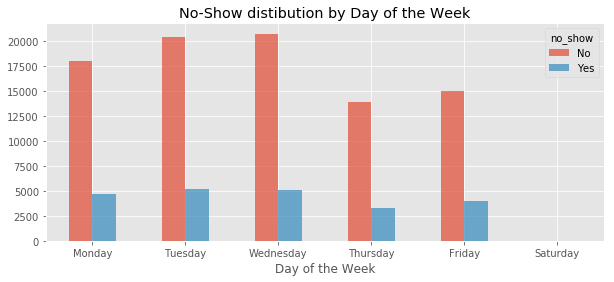

In [40]:
# Plot chart showing frequency of day of the week distribution and No-show
pd.crosstab(appointments.appointment_dow, appointments.no_show).plot(kind='bar', alpha=0.7, figsize=(10,4))
plt.xticks(rotation = 0)
plt.xlabel('Day of the Week')
  
# displaying the title
plt.title("No-Show distibution by Day of the Week");

Analysis shows that there are more people scheduled for appointments on Wenesdays and Tuesdays than any other day.  
Wednesday with the most appointments has the second lowest No-show rate of all days, meaning patients were more likely to show up for their appointments on Wednesday and Thursday than ano other day.  
While the number of patients booked on saturday is very small, Friday and Saturday have the highest No-show rate, this could be because patients would rather use their weekends to rest. 
The day of the week seems to have no significant effects on if patients show up for their appointments or not.

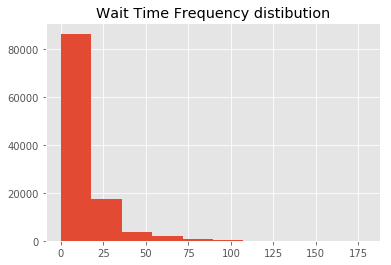

In [41]:
# Wait time distribution
appointments.wait_days.hist()
plt.title("Wait Time Frequency distibution");

In [42]:
# CReate criteria to create a new column that categorises the length of waiting time
criteria = [appointments['wait_days'].between(0, 0), appointments['wait_days'].between(1, 30), 
            appointments['wait_days'].between(31, 180)]

values = ['Same Day', '1 Month', '2 Months and More']

appointments['wait_cat'] = np.select(criteria, values, 0)

In [43]:
# Calculate No-Show rate for appointments that were missed.

no_show_proportion(appointments,'wait_cat')

no_show,No,Yes,Yes_Prop
wait_cat,,,
2 Months and More,6953,3425,0.330025
1 Month,44484,17097,0.277634
Same Day,36770,1792,0.046471


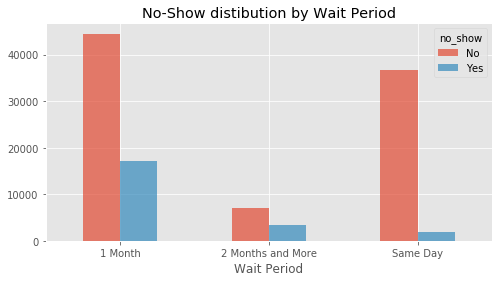

In [44]:
pd.crosstab(appointments.wait_cat, appointments.no_show).plot(kind='bar', alpha=0.7, figsize=(8,4))
plt.xticks(rotation = 0)
plt.xlabel('Wait Period')
  
# displaying the title
plt.title("No-Show distibution by Wait Period");

Wait time distributionn shows that, majority of appointments set up for within 40 days of being scheduled. Categorizing wait time into Months shows that very few people had to wait 2 months or more to visit the clinic.  
Here it looks like there's a strong relationship between wait time and patients showing up for the appointment. People are very very likely to show up for their appointments when they are booked on the same day, and the probability of showing up reduces the longer you have to wait. This is evidenced by people waiting 2 months and more being the least likely to show up for their appointments.

### Does neighbourhood influence patients showing up or not ?

In [45]:
# Produce a list containing the names of the top 10 occurring neighbourhoods in our dataset
appointments.neighbourhood.value_counts().head(10).index

Index(['JARDIM CAMBURI', 'MARIA ORTIZ', 'RESISTÊNCIA', 'JARDIM DA PENHA',
       'ITARARÉ', 'CENTRO', 'SANTA MARTHA', 'TABUAZEIRO', 'JESUS DE NAZARETH',
       'BONFIM'],
      dtype='object')

In [46]:
# filter appointments dataset to include only the neighbourhoods from above
top_locations = appointments.query("neighbourhood in ['JARDIM CAMBURI', 'MARIA ORTIZ', 'RESISTÊNCIA', 'JARDIM DA PENHA',\
                    'ITARARÉ', 'CENTRO', 'SANTA MARTHA', 'TABUAZEIRO', 'JESUS DE NAZARETH', 'BONFIM']")

In [47]:
# calculate no-show rate for neighbourhoods 

no_show_proportion(top_locations,'neighbourhood')

no_show,No,Yes,Yes_Prop
neighbourhood,,,
ITARARÉ,2591,923,0.262664
JESUS DE NAZARETH,2157,696,0.243954
CENTRO,2631,703,0.210858
MARIA ORTIZ,4586,1219,0.209991
RESISTÊNCIA,3525,905,0.204289
BONFIM,2223,550,0.198341
JARDIM CAMBURI,6252,1465,0.189841
TABUAZEIRO,2559,572,0.182689
JARDIM DA PENHA,3246,631,0.162755


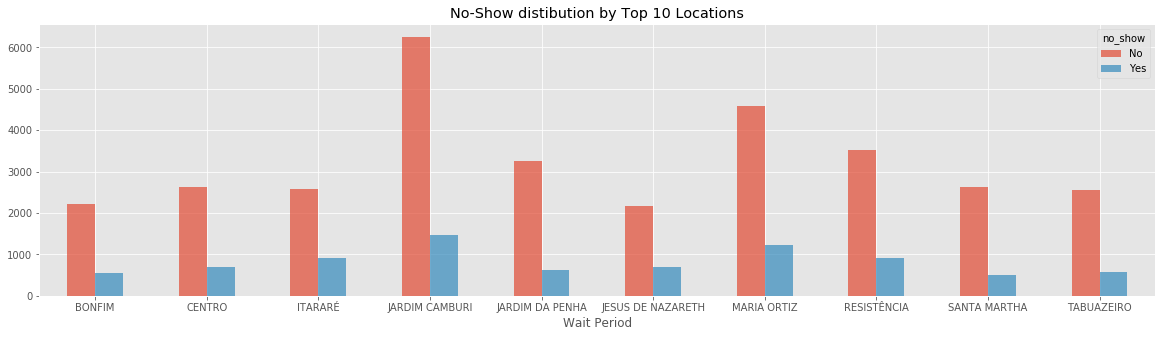

In [48]:
pd.crosstab(top_locations.neighbourhood, top_locations.no_show).plot(kind='bar', alpha=0.7, figsize=(20,5))
plt.xticks(rotation = 0)
plt.xlabel('Wait Period')
  
# displaying the title
plt.title("No-Show distibution by Top 10 Locations");

I don't believe this result provides much actionable information, although we see that ITARARÉ, JESUS DE NAZARETH and CENTRO have the highest No-Show rate of the top 10 locations. So patients in these areas are less likely to show up for their appointments.

<a id='conclusions'></a>
## Conclusions

> **CONCLUSION/SUGGESTIONS**:  
* Of the questions we asked in the beginning of this analysis, only wait time seems to have a strong influence on how patients react to meeting up for their appointments, with patients less likely to show up the longer they have to wait. This could possibly be as a result of patients feeling much better after a long period of wait or possibly patients forgetting about their appointments completely.  
* The day of the week shows a weak correlation as patients tend to prefer showing up during the weak compared to the end and start of the week, with Wednesday the most preffered day of the week.
* Analysis of neighbourhood's effect on No-show appointments does not show strong actionable information as we can only tell which locations have high No-Show rate but not why these places have high values. Having information on distance and neighbourhood income could help provide better insights.
* For Age, rate of No-Show tells us less than twenty percent of Infants and Seniors missed their appointments, which are the lowest rate of No-show by any of the age categories. This could be assumed to be as a result of these two categories have weaker immune systems, therefore Parents are less likely to take chances on the health of their infants. Adult Children also want to see their parents(Seniors) live longer and would most likely not take chances with their parents health.


>**LIMITATION**:  
* I believe the biggest limitation to performing this analysis is the lack of information on why these patients were visiting the clinic, this could give further insight in finding correlation between these reasons and why patients failed to show up for their appointments. This might even be able to imply causation as a patient with a migraine might feel better later and decide to no longer go to the clinic two weeks later, therefore the severity of the complaint can very likely be a strong determinant as to why patients don't show up.
* More information on neighbourhood would take this analysis by further by investingating if neighbourhoods with high No-Show rate are from the clinic, this can influence a patients decision. Is the area a high income neighbourhood as patients living in low-income areas might not be able to afford the trip to the clinic or even the fees for treatment and decide against going.

In [49]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0